### Úloha (Pridelenie).

- Musíte naprogramovať funkciu na **počítanie červených M&Ms** pomocou **Houghovej transformácie**.
- Funkcia by mala mať formát:  
  **početčervených, pixelové súradnice = JankoHrasko(img)**  
  (použite svoje „FirstName“).
- **Vstup:** jeden obrázok.
- **Výstup:**  
  - **numberOfReds** je celé číslo predstavujúce počet červených M&Ms.  
  - **pixelCoordinates[numberOfReds, 2]** - vektor súradníc stredov červených M&Ms vo formáte (x, y).
- Nezabudnite počítať **len červené M&Ms**, na vylúčenie iných farieb musíte vykonať **predspracovanie alebo následné spracovanie**.
- Termín je **9:15**, do ktorého by malo byť všetko na **Git**.
- Keď budete hotoví, **napíšte príspevok do komentárov** a vytvorte návod.

### Obrázok
V spodnej časti je zobrazený obrázok s roztrúsenými cukríkmi M&M rôznych farieb (červená, zelená, modrá, žltá, hnedá, oranžová).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, color
from typing import Tuple, Optional, List
from scipy import ndimage

In [ ]:
path = "/content/R.jpg"
img = io.imread(path)

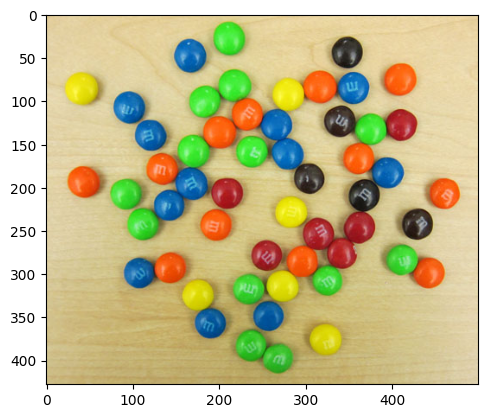

In [ ]:
plt.imshow(img)
plt.show()

In [117]:
def DmytroVarich(
    img: np.ndarray,
    target_color: str = "red",
    show_img: bool = False,
) -> Tuple[int, List[Tuple[int, int]]]:

  # Resize
  img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_NEAREST)

  # Normalization
  img = img.astype(np.float32) / 255
  img = np.clip(img, 0, 1)

  # Convert to Lab space
  imgLab = color.rgb2lab(img)

  def get_mms_color(color: str) -> np.ndarray:
    """Function for selecting mms of a certain color"""
    if color == 'red':
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 1] > 40,
          imgLab[:, :, 1] < 100,
          imgLab[:, :, 2] > 20,
          imgLab[:, :, 2] < 45
      ))
    elif color == "orange":
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 1] > 30,
          imgLab[:, :, 1] < 100,
          imgLab[:, :, 2] > 50,
          imgLab[:, :, 2] < 100
      ))
    elif color == "yellow":
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 1] > -20,
          imgLab[:, :, 1] < 25,
          imgLab[:, :, 2] > 50,
          imgLab[:, :, 2] < 100
      ))
    elif color == "green":
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 1] < -20,
          imgLab[:, :, 1] > -100,
          imgLab[:, :, 2] < 80,
          imgLab[:, :, 2] > -15
      ))
    elif color == "blue":
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 1] > -10,
          imgLab[:, :, 1] < 100,
          imgLab[:, :, 2] < -20,
          imgLab[:, :, 2] > -100
      ))
    elif color == "black":
      mms_color = np.logical_and.reduce((
          imgLab[:, :, 0] < 25,
          imgLab[:, :, 0] > 0
      ))
    else:
      raise ValueError(f"Unsupported color: {color}. Choose from ['red', 'orange', 'yellow', 'green', 'blue', 'black']")
    return mms_color

  def apply_hough_circles(mms_color: np.ndarray) -> np.ndarray:
    """Circle search function using the Hough transform"""
    gray_image = cv2.cvtColor(mms_color.astype(np.uint8) * 255, cv2.COLOR_GRAY2BGR)
    blured_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    median_image = ndimage.median_filter(blured_image, size=5)
    median_image_gray = cv2.cvtColor(median_image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(
        median_image_gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=10,
        param1=50,
        param2=15,
        minRadius=5,
        maxRadius=30
    )
    return circles

  def get_mms_info(circles: np.ndarray, color: str, img: np.ndarray, show_img: bool = False) -> int | str:
    """M&Ms counting and founding coordinates function"""
    mms_coordinates = []
    if circles is not None:
      if show_img:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
          center = (circle[0], circle[1])
          radius = circle[2]

          cv2.circle(img, center, radius, (0, 255, 0), 2)
          cv2.circle(img, center, 2, (0, 255, 0), 2)
          mms_coordinates.append(center)

        plt.imshow(np.clip(img, 0, 1))
        plt.title(f"Circles (Number of {color} m&m: {len(circles[0])})")
        plt.show()
    else:
      return "No circles found. No coordinates"
    return len(circles[0]), mms_coordinates

  # Determine the number of mms and their coordinates of each color
  mms_circles = apply_hough_circles(get_mms_color(target_color))
  number, coordinates = get_mms_info(mms_circles, target_color, img, show_img)
  return number, coordinates

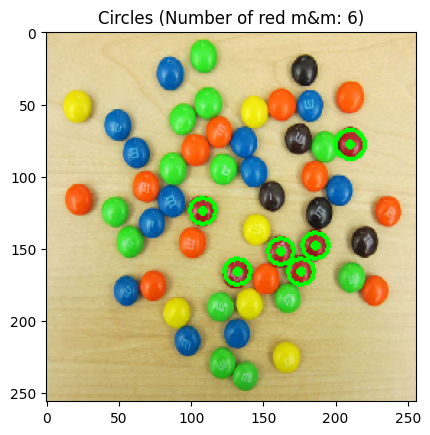

Number of red m&m: 6
Coordinates: [(108, 124), (162, 152), (132, 166), (186, 148), (176, 166), (210, 78)]


In [112]:
target_color = "red"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")

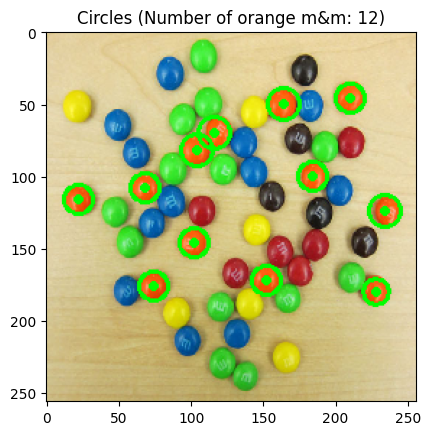

Number of orange m&m: 12
Coordinates: [(22, 116), (210, 46), (184, 100), (228, 180), (164, 50), (104, 82), (68, 108), (234, 124), (152, 172), (74, 176), (102, 146), (116, 70)]


In [113]:
target_color = "orange"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")

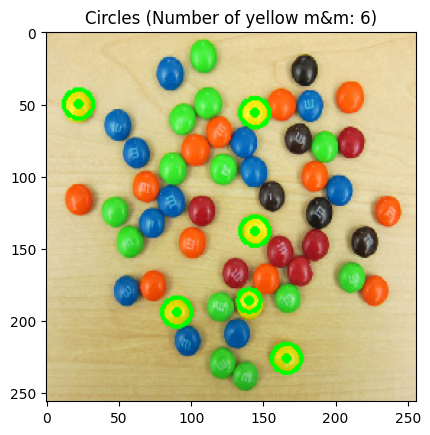

Number of yellow m&m: 6
Coordinates: [(144, 56), (144, 138), (166, 226), (90, 194), (22, 50), (140, 186)]


In [114]:
target_color = "yellow"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")

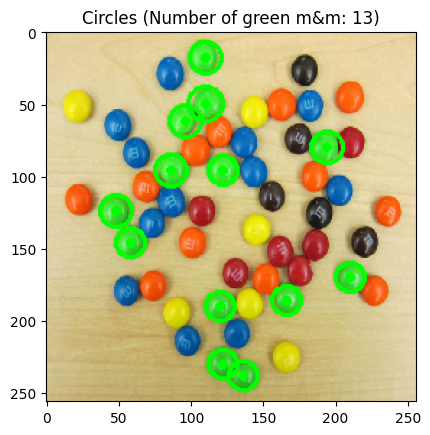

Number of green m&m: 13
Coordinates: [(120, 190), (210, 170), (122, 96), (48, 124), (110, 50), (166, 186), (58, 146), (194, 80), (136, 238), (110, 18), (96, 62), (122, 230), (86, 96)]


In [115]:
target_color = "green"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")

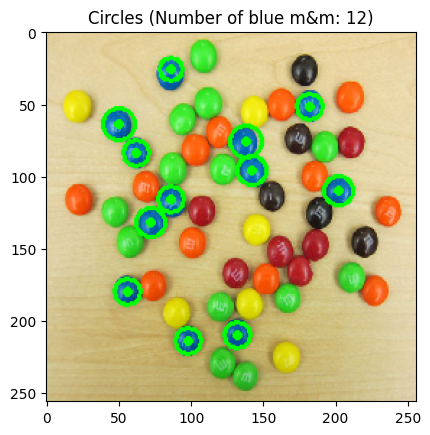

Number of blue m&m: 12
Coordinates: [(132, 210), (98, 214), (72, 132), (62, 84), (56, 180), (50, 64), (202, 110), (182, 52), (138, 76), (86, 116), (142, 96), (86, 26)]


In [118]:
target_color = "blue"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")

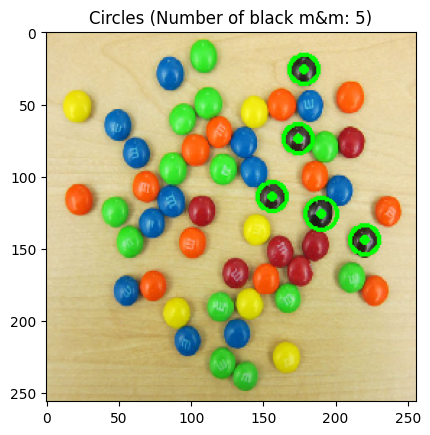

Number of black m&m: 5
Coordinates: [(220, 144), (178, 26), (174, 74), (156, 114), (190, 126)]


In [119]:
target_color = "black"
number, coordinates = DmytroVarich(img, target_color, True)
print(f"Number of {target_color} m&m: {number}")
print(f"Coordinates: {coordinates}")